### Week-2

### Objective:  

Build a greater understanding of the dataset by asking questions like how the labels in the dataset are distributed and determine the different data types of features and their quantities.

1. You would like to know about the distribution of the websites so as to know what percentage of websites are phishing in the dataset. Use the Result column of the dataset and the Counter Python module to know the class distribution of the websites. After getting a hold of the numbers, arrange and convert them to a pandas DataFrame.

2. A picture is worth a thousand words! Now that you have a DataFrame like the above, convert it to a bar plot using the matplotlib library. Plots are great for communication.

3. Use pandas to extract summary statistics from the data. Investigate closely and see the ranges of the different features, their standard deviation, and so on. This will help you to identify the statistical traits in the data.

4. Investigate the data types and the quantities of the features present in the dataset using methods provided by pandas.

### 1. Imports

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

It is difficult to reproduce the same results across runs for our machine learning model — even when we run the same script on the same training data. 

It could also lead to challenges in figuring out whether a change in performance is due to an actual model or data modification, or merely the result of a new random sample.

These sources of variation can be tackled to have full visibility into the data, model and parameters, and details on the environment that led to a specific result. This level of reproducibility will reduce unexpected variations across our runs and help us debug machine learning experiments.

To achive reproducability, randomness appears in machine learning ---- to achieve reproducible, deterministic, and more generalizable results we can carefully set the random seed.

We carefully set that seed variable for all of our frameworks

In [41]:
np.random.seed(123)
tf.random.set_seed(123)

## 2. The Data

### 2.1 Load the data....

In [42]:
df = pd.read_csv('Phishing.csv')

### 2.2 Explore the data

It's important to look at our data, to make sure we understand the format, how it's stored, what type of values it holds, etc. Even if we've read descriptions about our data, the actual data may not be what we expect.

In [43]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


 The dataset has a large number of features, so we modify the output a bit to make it fit the screen.
 

In [44]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


### The exact dimensions of the dataset

In [45]:
df.shape

(11055, 31)

The ndim attribute returns the number of dimensions of  DataFrame or Series. It will always be 2 for DataFrames and 1 for Series

In [46]:
df.ndim

2

### Unique Labels in the dataset

The labels of the dataset are given in the Result column. We can explore the unique labels in Result column.

In [47]:
unique_Labels = df.Result.unique()

In [48]:
unique_Labels

array([-1,  1])

In [49]:
unique_Labels.size

2

In [50]:
print ("The Result column has ", unique_Labels.size ," unique values i.e.", unique_Labels)

The Result column has  2  unique values i.e. [-1  1]


### Summary of dataset

In [51]:
(rows,cols)= df.shape  
print ("The fishing dataset has ",rows," samples and ",cols, "features")
print("The dataset has ", df.ndim, "dimensions")
print ("The Result column has ", unique_Labels.size ," unique values i.e.", unique_Labels)

The fishing dataset has  11055  samples and  31 features
The dataset has  2 dimensions
The Result column has  2  unique values i.e. [-1  1]


In [52]:
#find the class distribution of the websites.  
df_class_dist = df['Result'].value_counts().rename_axis('Class-Label').reset_index(name='Number of Observations')

In [53]:
#arrange and convert them to a pandas DataFrame.
df_class_dist

,Class-Label,Number of Observations
0,1,6157
1,-1,4898


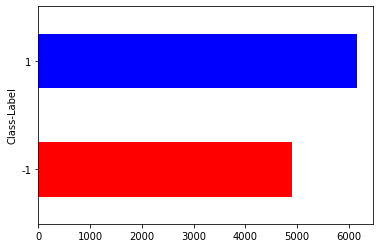

In [64]:

#convert the DataFrame to a bar plot using the matplotlib library.

df_class_dist.groupby('Class-Label')['Number of Observations'].sum().plot(kind='barh', color=['red', 'blue']);


In [68]:
#extract summary statistics from the data
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [71]:
#Investigate the data types and the quantities of the features present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma